In [1]:
%run "/home/usriniva/uller_modified/discrete_time/Hanna_simu/simulation/impport_packages.ipynb"    #import all necessary packages - numpy, pandas etc

In [2]:
no_files= 6
dim_objnames_epi= {}



In [3]:
# Folder path
folder_path = "/home/usriniva/uller_modified/discrete_time/Hanna_simu/results/epi"


for i, filename in enumerate(sorted(os.listdir(folder_path))):
    if filename.endswith(".pkl"):
        
        file_path = os.path.join(folder_path, filename)
        print(f"Loading: {filename}")
        
        # Load the pickle file
        with open(file_path, "rb") as file:
            data = pickle.load(file)
            
        nof_dims = re.findall(r'[0-9]+', filename)[0]
        name= f'epi_{nof_dims}'
        dim_objnames_epi[name] = data
        
        print(f"Loaded {filename} into {name}")

Loading: results_dim1.pkl
Loaded results_dim1.pkl into epi_1
Loading: results_dim10.pkl
Loaded results_dim10.pkl into epi_10
Loading: results_dim2.pkl
Loaded results_dim2.pkl into epi_2
Loading: results_dim25.pkl
Loaded results_dim25.pkl into epi_25
Loading: results_dim35.pkl
Loaded results_dim35.pkl into epi_35
Loading: results_dim5.pkl
Loaded results_dim5.pkl into epi_5


In [70]:
no_files= 6
dim_objnames_onlygen= {}



In [77]:
# Folder path
folder_path = "/home/usriniva/uller_modified/discrete_time/Hanna_simu/results/only_gen"


for i, filename in enumerate(sorted(os.listdir(folder_path))):
    if filename.endswith(".pkl"):
        
        file_path = os.path.join(folder_path, filename)
        print(f"Loading: {filename}")
        
        # Load the pickle file
        with open(file_path, "rb") as file:
            data = pickle.load(file)
            
        nof_dims = re.findall(r'[0-9]+', filename)[0]
        name= f'ntl_{nof_dims}'
        dim_objnames_onlygen[name] = data
        
        print(f"Loaded {filename} into {name}")

Loading: results_dim10_og.pkl
Loaded results_dim10_og.pkl into ntl_10
Loading: results_dim1_og.pkl
Loaded results_dim1_og.pkl into ntl_1
Loading: results_dim25_og.pkl
Loaded results_dim25_og.pkl into ntl_25
Loading: results_dim2_og.pkl
Loaded results_dim2_og.pkl into ntl_2
Loading: results_dim35_og.pkl
Loaded results_dim35_og.pkl into ntl_35
Loading: results_dim5_og.pkl
Loaded results_dim5_og.pkl into ntl_5


In [78]:
globals().update(dim_objnames_epi) # neat way to unpack variables
globals().update(dim_objnames_onlygen) # neat way to unpack variables


In [79]:
# Sort the keys numerically by extracting the number from each name
sorted_epi_keys = sorted(dim_objnames_epi.keys(), key=lambda x: int(re.findall(r'\d+', x)[0]))
sorted_og_keys = sorted(dim_objnames_onlygen.keys(), key=lambda x: int(re.findall(r'\d+', x)[0]))


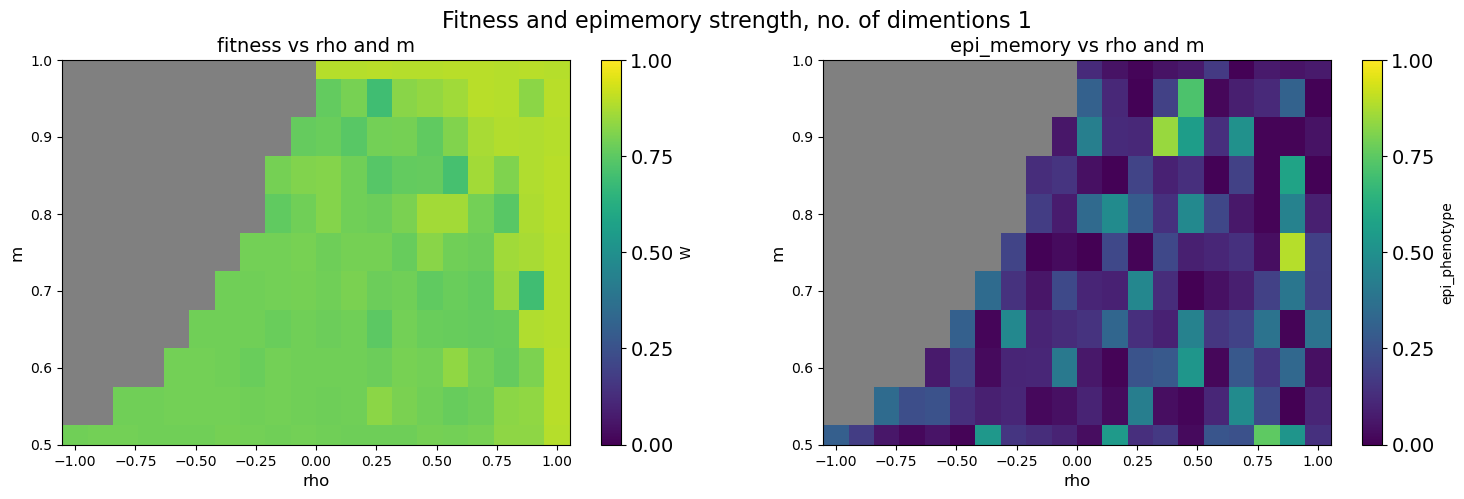

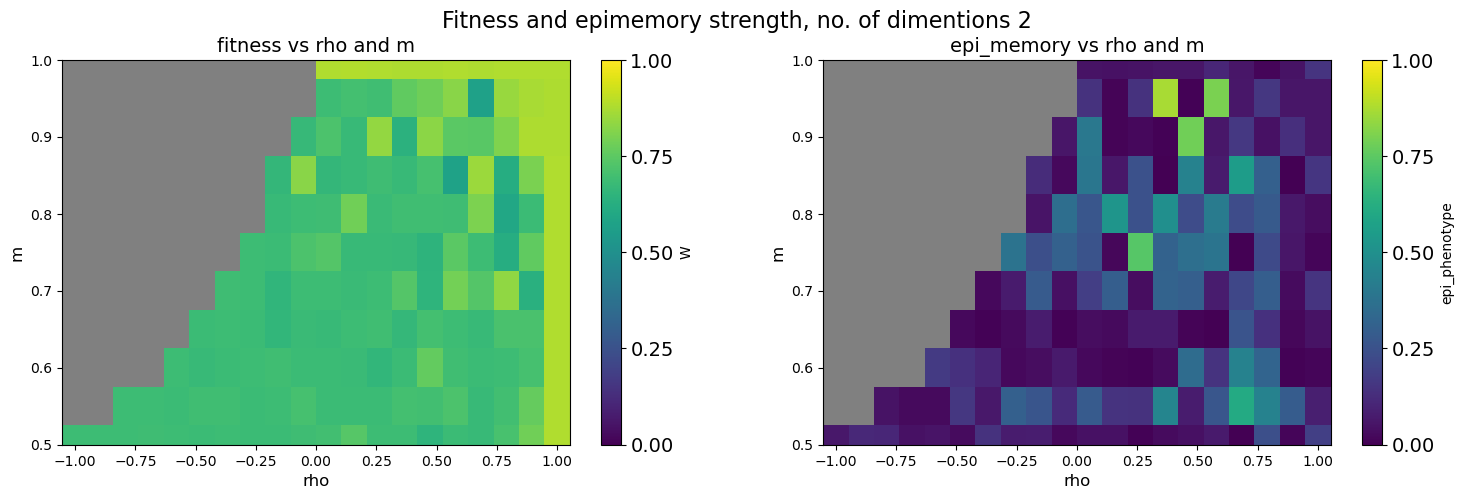

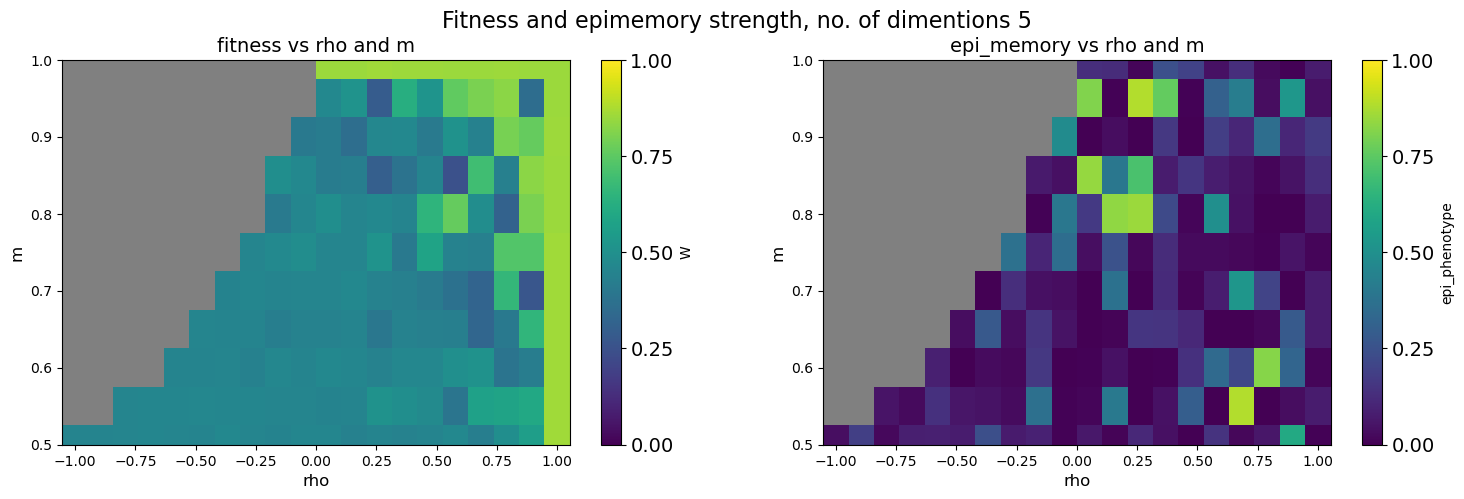

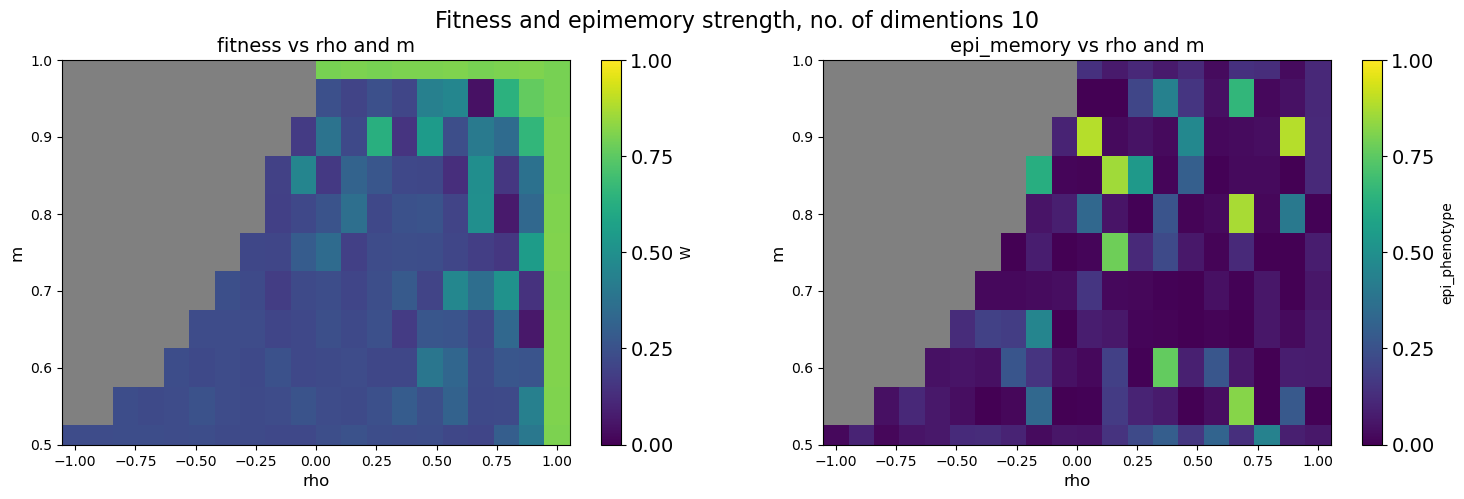

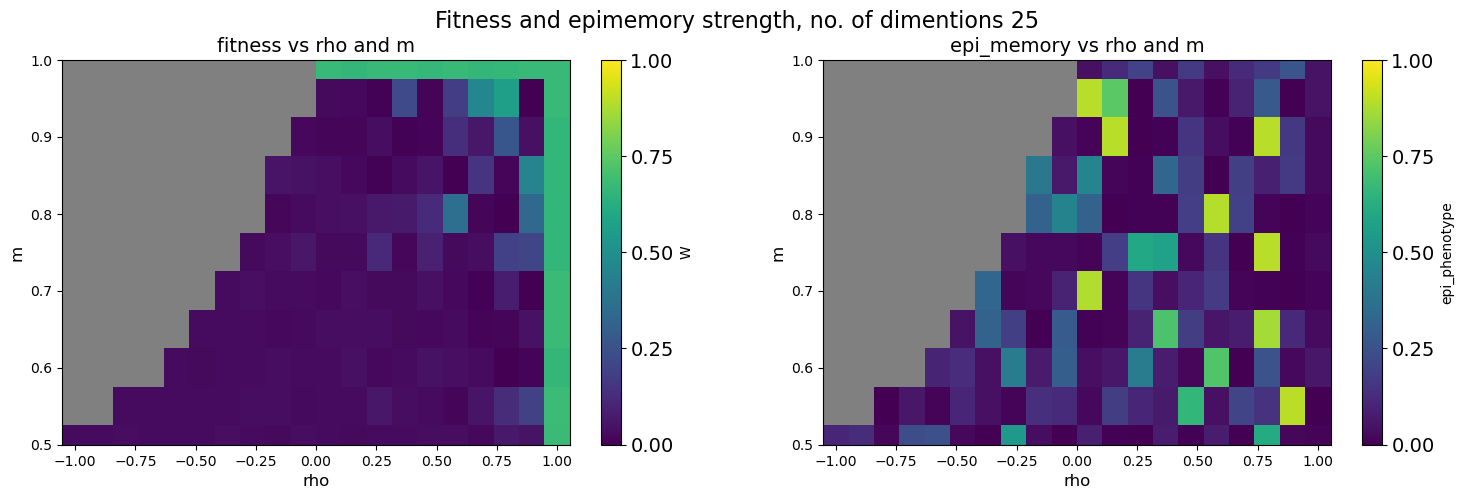

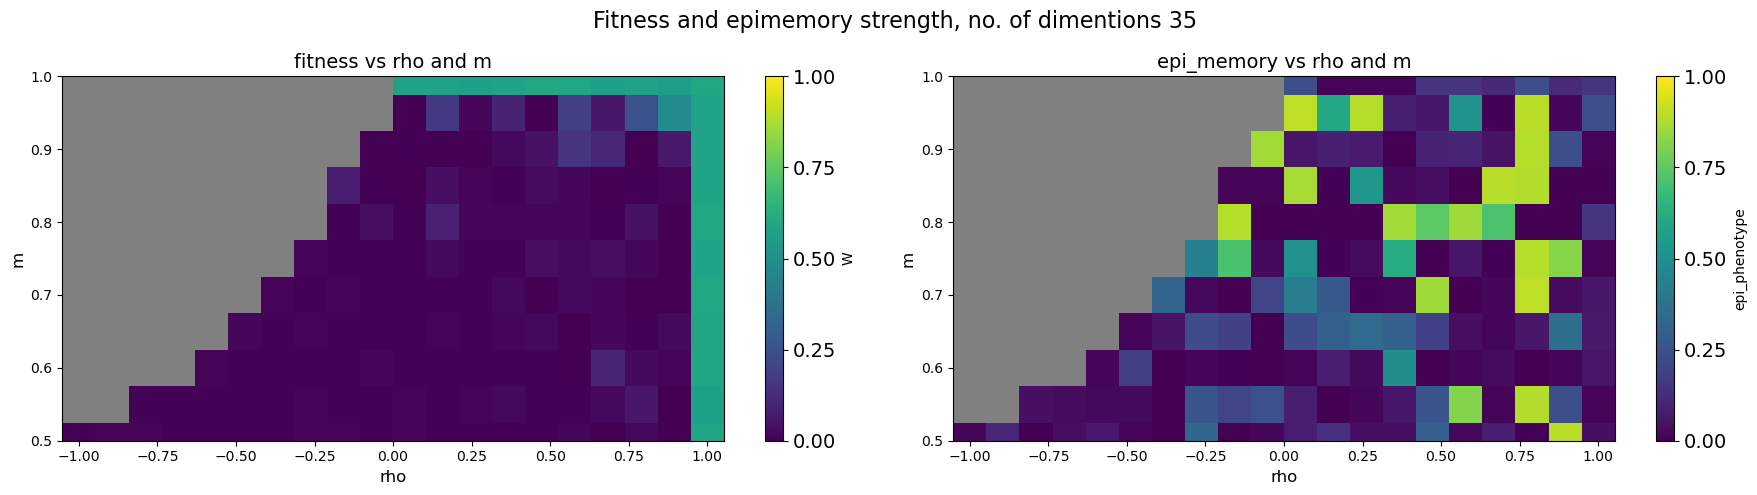

In [80]:

for dim_name in sorted_epi_keys:
    
    dim = globals()[dim_name]
    
    nof_dims = re.findall(r'[0-9]+', dim_name)[0]
        
    rho_ext, m_ext = np.meshgrid(dim['rho_m_alpha_beta'][:,0],dim['rho_m_alpha_beta'][:,1])

    df = pd.DataFrame({
        
    'rho': dim['rho_m_alpha_beta'][:,0],
    'm': dim['rho_m_alpha_beta'][:,1],
    'fitness':np.mean(dim['meanw'][:,-10:], axis=1),
    'epi_mem_p': np.mean(dim['meanmemory_p'][:,-10:], axis=1)   
    
    })

    fig, ax = plt.subplots(1, 2, figsize=(18, 5))
    fig.suptitle(f"Fitness and epimemory strength, no. of dimentions {nof_dims}", fontsize=16)
    
    # Colormap and normalization
    cmap = plt.cm.viridis.copy()  # copy to modify safely
    cmap.set_bad(color='gray')    # gray for masked values
    norm = mcolors.Normalize(vmin=0.0, vmax=1.0)  # consistent color range

    # --- Plot 1: fitness ---
    pivoted_fitness = df.pivot_table(
        index='m',
        columns='rho',
        values='fitness'
    ).sort_index().sort_index(axis=1)

    pcm1 = ax[0].pcolormesh(
        pivoted_fitness.columns,    # X (m)
        pivoted_fitness.index,      # Y (rho)
        pivoted_fitness.values,     # Z
        cmap=cmap,
        norm=norm,
        shading='auto'
    )
    cbar1 = fig.colorbar(pcm1, ax=ax[0], label='W', ticks=[0.0, 0.25, 0.5, 0.75, 1.0])
    cbar1.ax.tick_params(labelsize=14)
    ax[0].set_xlabel('rho', fontsize=12)
    ax[0].set_ylabel('m', fontsize=12)
    ax[0].set_ylim(0.5,1)
    ax[0].set_title('fitness vs rho and m', fontsize=14)

    # --- Plot 2: epi_mem_p ---
    pivoted_epi = df.pivot_table(
        index='m',
        columns='rho',
        values='epi_mem_p'
    ).sort_index().sort_index(axis=1)

    pcm2 = ax[1].pcolormesh(
        pivoted_epi.columns, 
        pivoted_epi.index,
        pivoted_epi.values,
        cmap=cmap,
        norm=norm,
        shading='auto'
    )
    cbar2 = fig.colorbar(pcm2, ax=ax[1], label=r'epi_phenotype', ticks=[0.0, 0.25, 0.5, 0.75, 1.0])
    cbar2.ax.tick_params(labelsize=14)
    ax[1].set_xlabel('rho', fontsize=12)
    ax[1].set_ylabel('m', fontsize=12)
    ax[1].set_ylim(0.5,1)
    ax[1].set_title('epi_memory vs rho and m', fontsize=14)

plt.tight_layout()
plt.show()

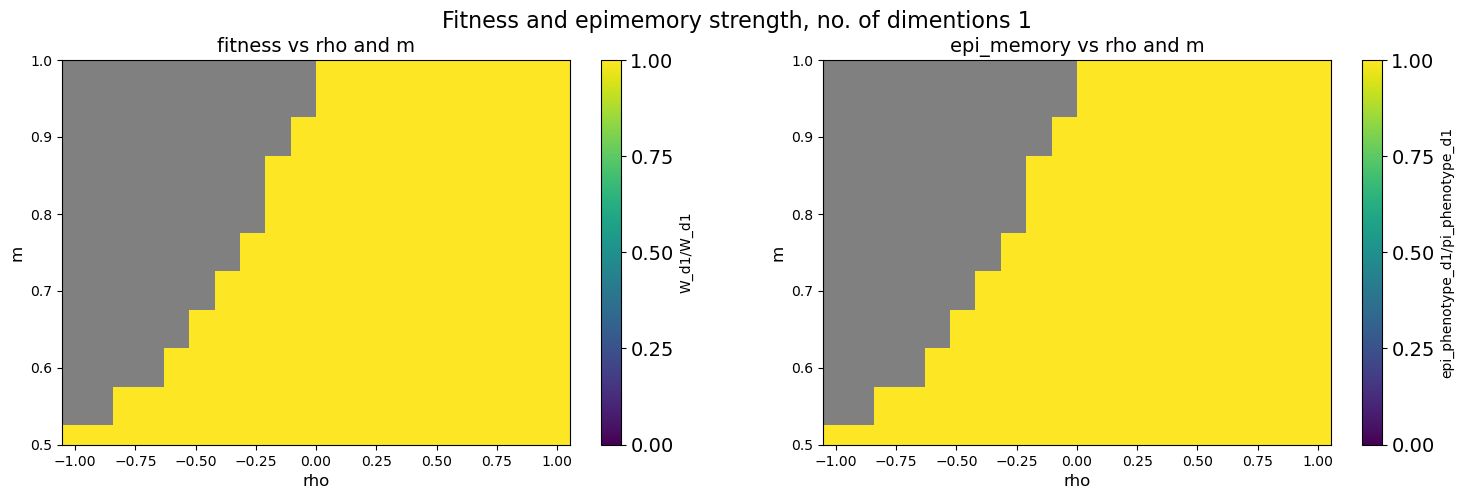

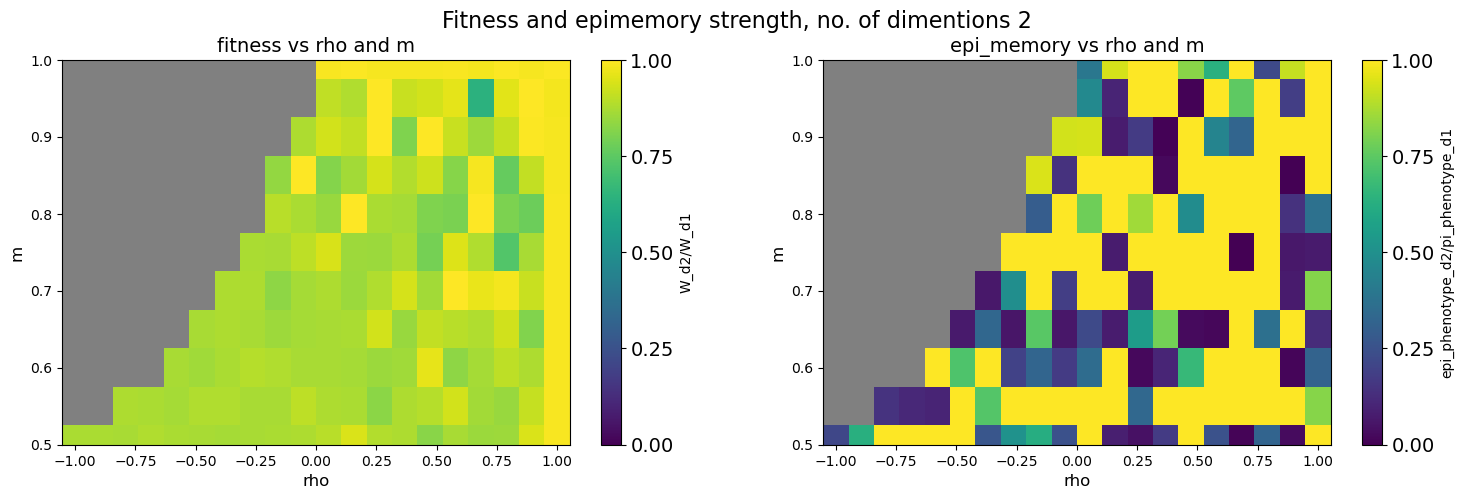

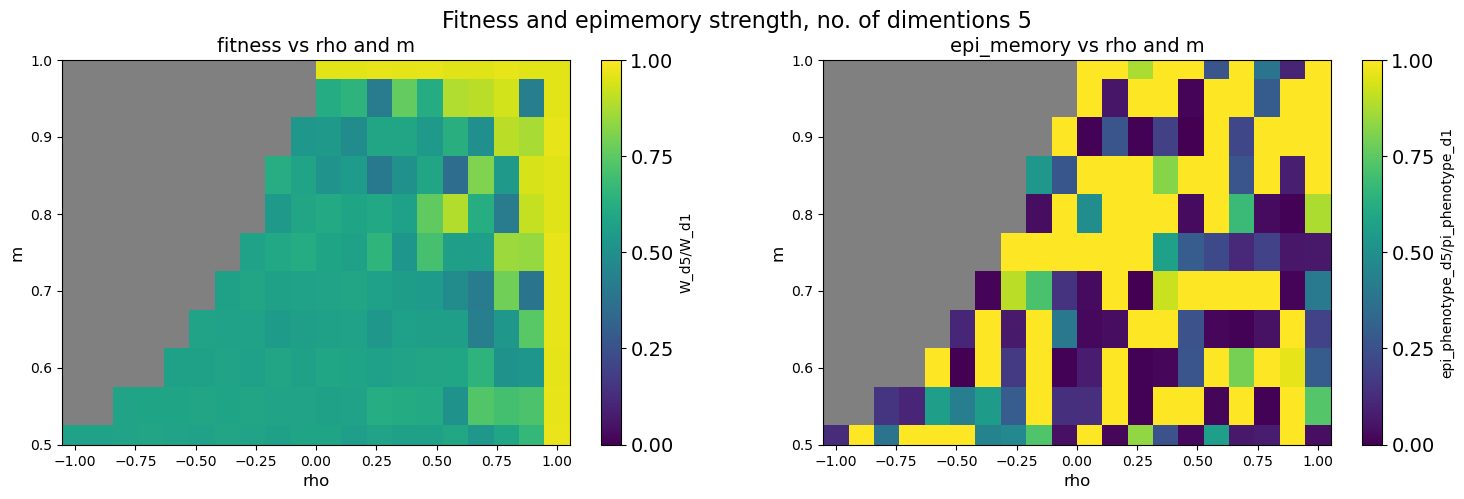

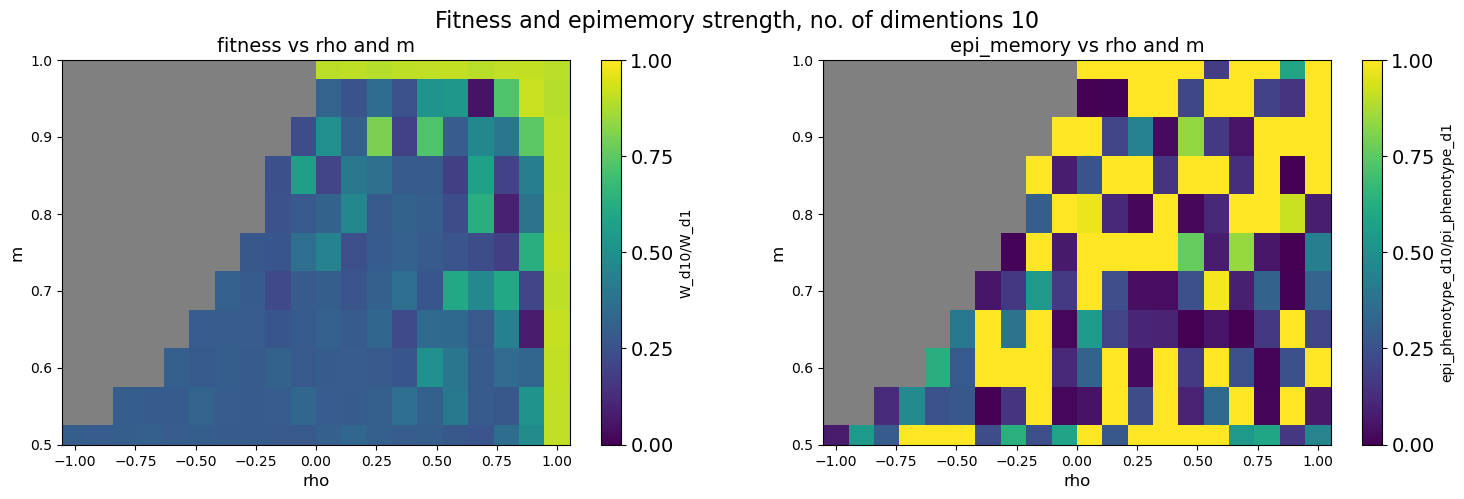

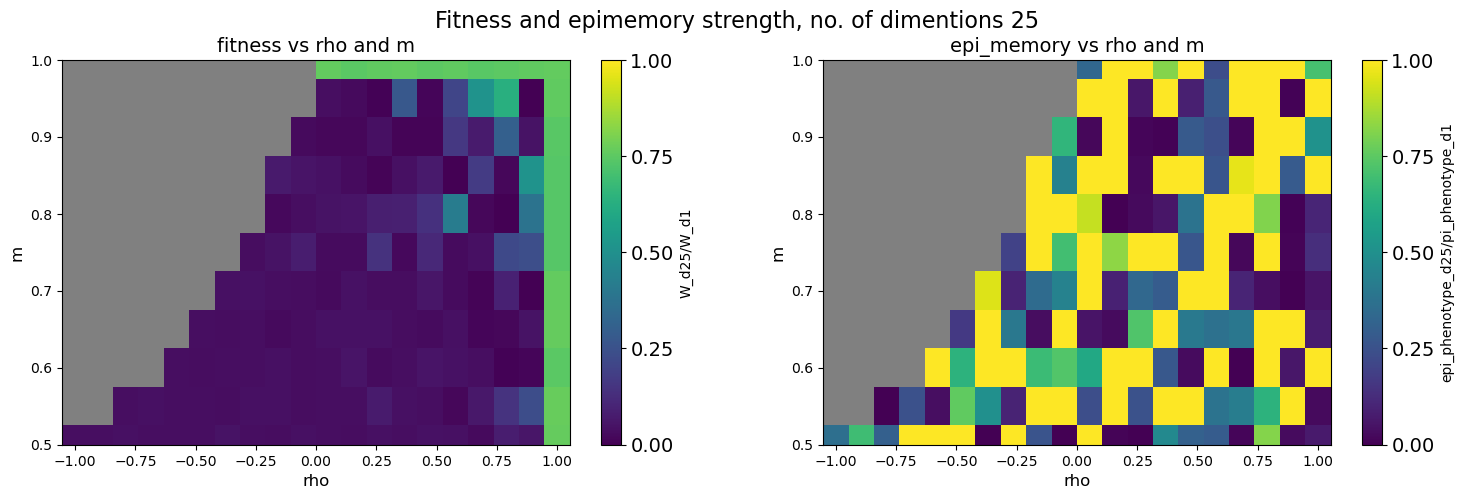

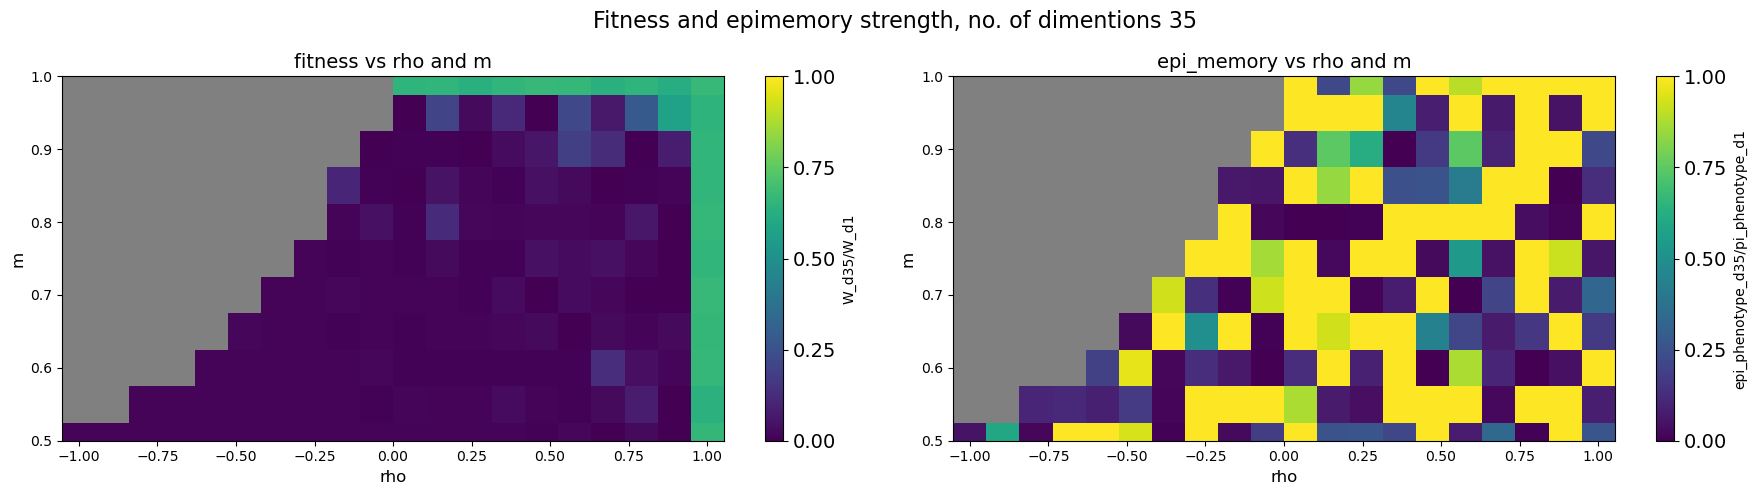

In [84]:

for dim_name in sorted_epi_keys:
    
    dim = globals()[dim_name]
    
    nof_dims = re.findall(r'[0-9]+', dim_name)[0]
        
    rho_ext, m_ext = np.meshgrid(dim['rho_m_alpha_beta'][:,0],dim['rho_m_alpha_beta'][:,1])

    df_1 = pd.DataFrame({
        
    'rho': epi_1['rho_m_alpha_beta'][:,0],
    'm': epi_1['rho_m_alpha_beta'][:,1],
    'fitness':np.mean(epi_1['meanw'][:,-10:], axis=1),
    'epi_mem_p': np.mean(epi_1['meanmemory_p'][:,-10:], axis=1)   
    
    })
    
    df = pd.DataFrame({
        
    'rho': dim['rho_m_alpha_beta'][:,0],
    'm': dim['rho_m_alpha_beta'][:,1],
    'fitness':np.mean(dim['meanw'][:,-10:], axis=1)/ df_1['fitness'],
    'epi_mem_p': np.mean(dim['meanmemory_p'][:,-10:], axis=1)/  df_1['epi_mem_p']   
    
    })

    fig, ax = plt.subplots(1, 2, figsize=(18, 5))
    fig.suptitle(f"Fitness and epimemory strength, no. of dimentions {nof_dims}", fontsize=16)
    
    # Colormap and normalization
    cmap = plt.cm.viridis.copy()  # copy to modify safely
    cmap.set_bad(color='gray')    # gray for masked values
    norm = mcolors.Normalize(vmin=0.0, vmax=1.0)  # consistent color range

    # --- Plot 1: fitness ---
    pivoted_fitness = df.pivot_table(
        index='m',
        columns='rho',
        values='fitness'
    ).sort_index().sort_index(axis=1)

    pcm1 = ax[0].pcolormesh(
        pivoted_fitness.columns,    # X (m)
        pivoted_fitness.index,      # Y (rho)
        pivoted_fitness.values,     # Z
        cmap=cmap,
        norm=norm,
        shading='auto'
    )
    cbar1 = fig.colorbar(pcm1, ax=ax[0], label=f'W_d{nof_dims}/W_d1', ticks=[0.0, 0.25, 0.5, 0.75, 1.0])
    cbar1.ax.tick_params(labelsize=14)
    ax[0].set_xlabel('rho', fontsize=12)
    ax[0].set_ylabel('m', fontsize=12)
    ax[0].set_ylim(0.5,1)
    ax[0].set_title('fitness vs rho and m', fontsize=14)

    # --- Plot 2: epi_mem_p ---
    pivoted_epi = df.pivot_table(
        index='m',
        columns='rho',
        values='epi_mem_p'
    ).sort_index().sort_index(axis=1)

    pcm2 = ax[1].pcolormesh(
        pivoted_epi.columns, 
        pivoted_epi.index,
        pivoted_epi.values,
        cmap=cmap,
        norm=norm,
        shading='auto'
    )
    cbar2 = fig.colorbar(pcm2, ax=ax[1], label=f'epi_phenotype_d{nof_dims}/pi_phenotype_d1', ticks=[0.0, 0.25, 0.5, 0.75, 1.0])
    cbar2.ax.tick_params(labelsize=14)
    ax[1].set_xlabel('rho', fontsize=12)
    ax[1].set_ylabel('m', fontsize=12)
    ax[1].set_ylim(0.5,1)
    ax[1].set_title('epi_memory vs rho and m', fontsize=14)

plt.tight_layout()
plt.show()

### correlation plots

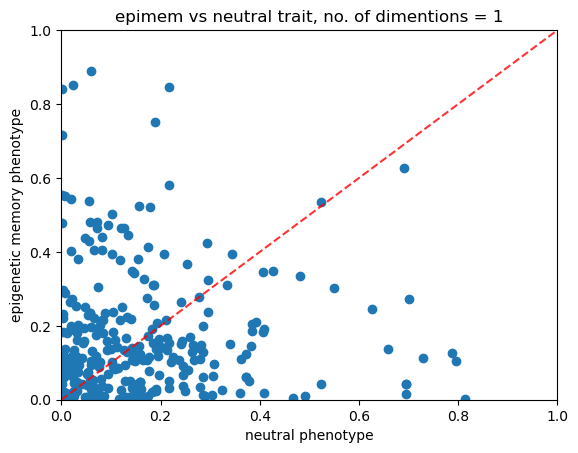

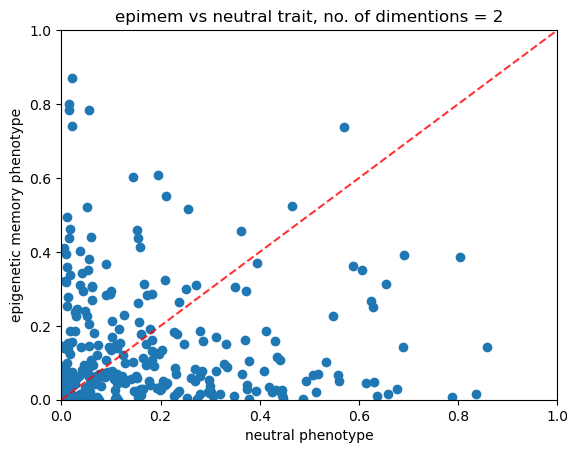

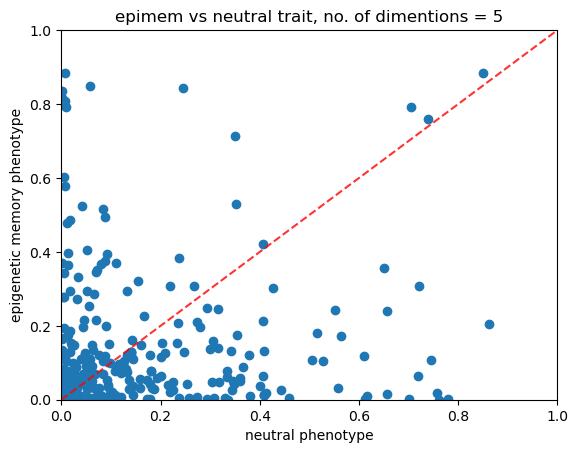

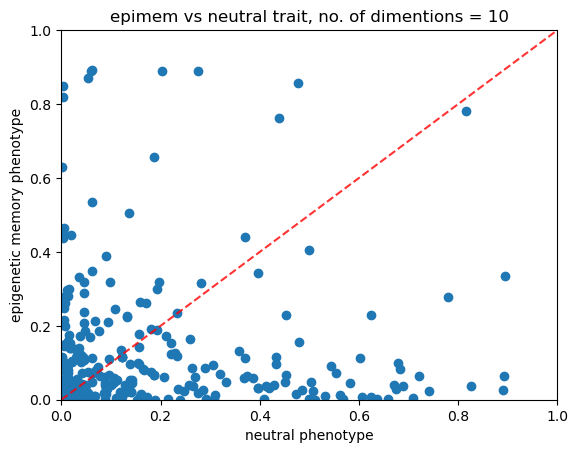

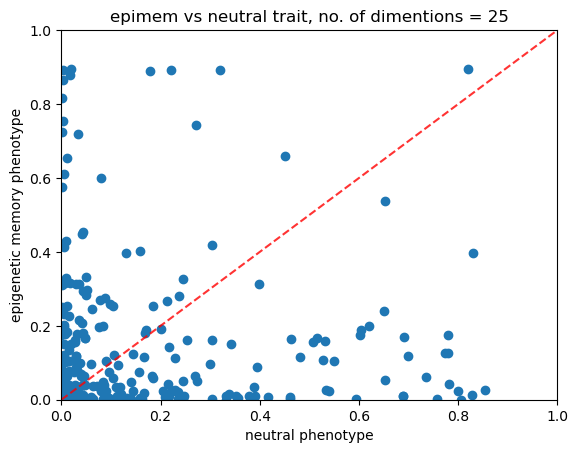

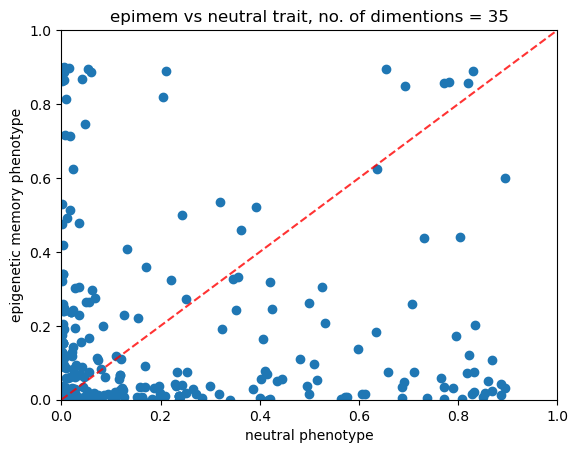

In [82]:

for dim_name in sorted_epi_keys:
    
    dim = globals()[dim_name]
    
    nof_dims = re.findall(r'[0-9]+', dim_name)[0]
        
    rho_ext, m_ext = np.meshgrid(dim['rho_m_alpha_beta'][:,0],dim['rho_m_alpha_beta'][:,1])

    df = pd.DataFrame({
        
    'rho': dim['rho_m_alpha_beta'][:,0],
    'm': dim['rho_m_alpha_beta'][:,1],
    'fitness':np.mean(dim['meanw'][:,-10:], axis=1).flatten(),
    'epi_mem_p': np.mean(dim['meanmemory_p'][:,-10:], axis=1).flatten(),   
    'neutral':np.mean(dim['meanneutral_p'][:,-10:], axis=1).flatten()
    })
    
    
    
    plt.scatter( df['neutral'], df['epi_mem_p'] )
    plt.title(f"epimem vs neutral trait, no. of dimentions = {nof_dims}")
    plt.plot((0,1), (0,1), 'r--', alpha=0.8)  # red dashed line
    
    plt.ylabel("epigenetic memory phenotype")
    plt.xlabel("neutral phenotype")
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()
    
    

In [ ]:
#dim_objnames_epi_subset = {epi: dim_objnames_epi[epi] for epi in ['epi_1','epi_2', 'epi_3','epi_4']} #Dictionary comprehension (cool)


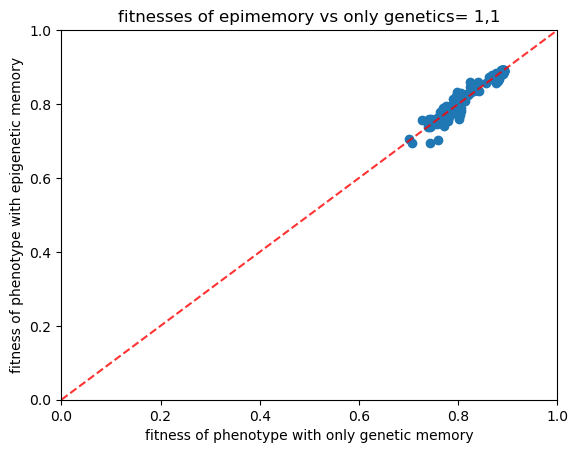

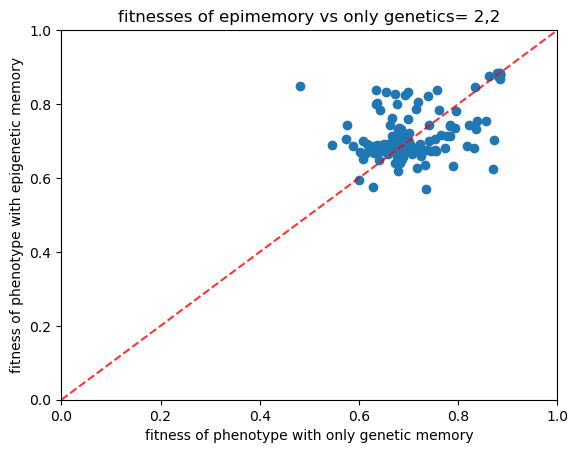

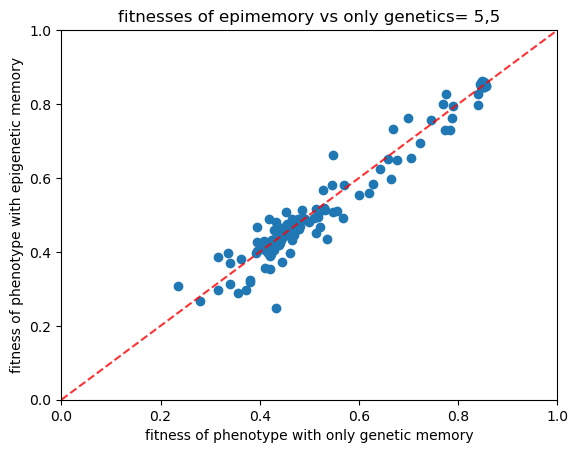

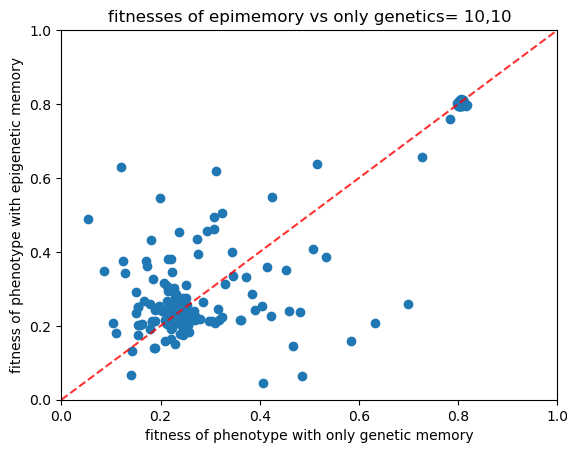

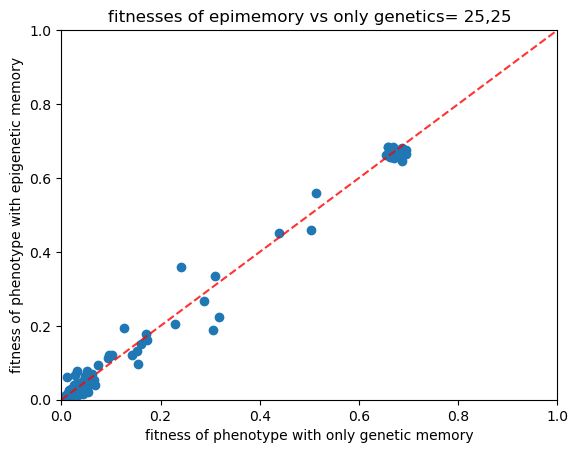

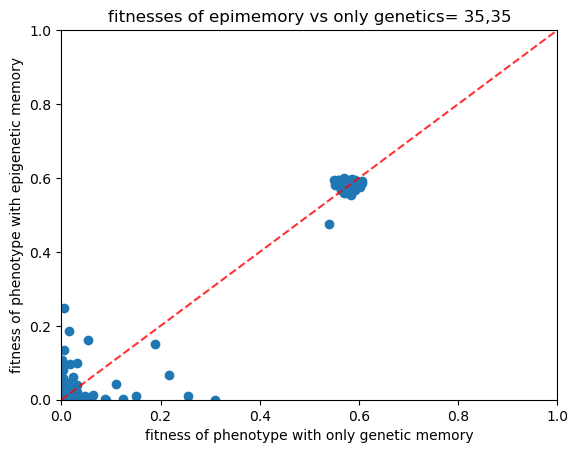

In [83]:
for dim_name in zip(sorted_epi_keys, sorted_og_keys):
    
    dim_epi = globals()[dim_name[0]] #save all objects in the dictionary as seperate objects
    dim_og = globals()[dim_name[1]]#save all objects in the dictionary as seperate objects
    
    nof_dims_e = re.findall(r'[0-9]+', dim_name[0])[0] #choose the number in second elemenmt of the zip set from above
    nof_dims_n = re.findall(r'[0-9]+', dim_name[1])[0]    #choose the number in second elemenmt of the zip set from above
    
    rho_ext, m_ext = np.meshgrid(dim_epi['rho_m_alpha_beta'][:,0],dim_epi['rho_m_alpha_beta'][:,1])

    df_epi = pd.DataFrame({
        
    'rho': dim_epi['rho_m_alpha_beta'][:,0],
    'm': dim_epi['rho_m_alpha_beta'][:,1],
    'fitness':np.mean(dim_epi['meanw'][:,-10:], axis=1),
    'epi_mem_p': np.mean(dim_epi['meanw'][:,-10:], axis=1).flatten(),   
    'neutral':np.mean(dim_epi['meanw'][:,-10:], axis=1).flatten()
    })
    
    df_og = pd.DataFrame({
        
    'rho': dim_og['rho_m_alpha_beta'][:,0],
    'm': dim_og['rho_m_alpha_beta'][:,1],
    'fitness':np.mean(dim_og['meanw'][:,-10:], axis=1),
    })
    
    
    plt.scatter(df_og['fitness'] , df_epi['fitness'])
    plt.title(f"fitnesses of epimemory vs only genetics= {nof_dims_n},{nof_dims_e}")
    plt.plot((0,1), (0,1), 'r--', alpha=0.8)  # red dashed line
    
    plt.xlabel("fitness of phenotype with only genetic memory")
    plt.ylabel("fitness of phenotype with epigenetic memory")
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()
    
    